Doenças Cardiovasculares - Análise de exploração de dados

A presente análise tem como objetivo compreender do comportamente baseado em uma base de dados de doenças cardivasculáres. Esse problemas são uma classe contendo diferentes tipos de doenças que afetam de alguma maneira o coração ou os vasos sanguíneos. Dentro da classe, existem várias doenças comoangina de peito, cardiopatia, arritmia cardíaca e aneurisma da aorta. Segundo pesquisas, apesar de ser uma das principais causas de morte em todo o mundo, estima-se que cerca de 90% das doenças cardiovasculares poderiam ser evitadas por meio da adoção de algumas medidas e mudanças no lifestyle. O uso de Inteligência Artificial tem impactado profundamente a área da saúde, e tem proporcionado aos profissionais médicos insumos de inteligência cada vez mais precisos.<p> A Base de dados do coletado da Cleveland Clinic Foundation e se encontra disponível no conhecido Repositório UCI Machine Learning. O dataset processado contém dados de 303 pessoas e 14 variáveis. As variaveis descrevem características específicas e técnicas de laudos médicos. Sendo alguma delas: 



In [2]:
#Importando bibliotecas

#Manipulacao de dados
import numpy as np
import pandas as pd

#Visualizacao de dados
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno

from sklearn.preprocessing import LabelEncoder

In [18]:
df = pd.read_csv('heart-disease.txt', header=0, sep=',', encoding='utf-8')

In [26]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [42]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Todas as variáveis representam especificações de oriundas de exames e condições do paciente. No caso da coluna num, refere-se a chance de um paciente ter uma doença cardiáca:
<p>0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
<p>1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)

In [54]:
for i in df.columns:
    ##print(f'\nColuna: {i}, {df_merge[i].unique()}')
    print(df[i].value_counts(normalize=True).reset_index())

    index       age
0    58.0  0.062706
1    57.0  0.056106
2    54.0  0.052805
3    59.0  0.046205
4    52.0  0.042904
5    60.0  0.039604
6    51.0  0.039604
7    56.0  0.036304
8    62.0  0.036304
9    44.0  0.036304
10   64.0  0.033003
11   41.0  0.033003
12   67.0  0.029703
13   63.0  0.029703
14   42.0  0.026403
15   43.0  0.026403
16   45.0  0.026403
17   53.0  0.026403
18   55.0  0.026403
19   61.0  0.026403
20   65.0  0.026403
21   50.0  0.023102
22   66.0  0.023102
23   48.0  0.023102
24   46.0  0.023102
25   47.0  0.016502
26   49.0  0.016502
27   70.0  0.013201
28   68.0  0.013201
29   35.0  0.013201
30   39.0  0.013201
31   69.0  0.009901
32   71.0  0.009901
33   40.0  0.009901
34   34.0  0.006601
35   37.0  0.006601
36   38.0  0.006601
37   29.0  0.003300
38   77.0  0.003300
39   74.0  0.003300
40   76.0  0.003300
   index       sex
0    1.0  0.679868
1    0.0  0.320132
   index        cp
0    4.0  0.475248
1    3.0  0.283828
2    2.0  0.165017
3    1.0  0.075908
    inde

In [39]:
(df[df.num>1].num.count()/df.num.count())*100

27.722772277227726

Nos dados presentes, cerca de 28% das amostras apresentam algum grau de doença cardiáca.

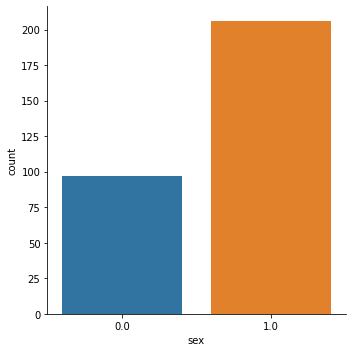

In [52]:
sns.catplot(x='sex', data=df, kind='count')

In [56]:
(df[df.sex==0].num.count()/df.num.count())*100, (df[df.sex==1].num.count()/df.num.count())*100

(32.01320132013201, 67.98679867986799)

Cerca de 32% dos casos atingem mulheres enquanto a maior parte de 68% atingem os homens.

In [66]:
df.loc[df['num'] >= 1, 'num2'] = 1
df.loc[df['num'] == 0, 'num2'] = 0

Verificando a idade onde há mais ocorrências de doenças cardiovasculáres. 

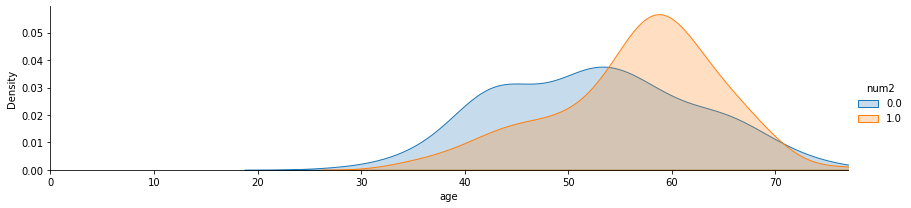

In [69]:
fig = sns.FacetGrid(df, hue='num2',aspect=4)
fig.map(sns.kdeplot,'age',shade=True)
oldest = df['age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

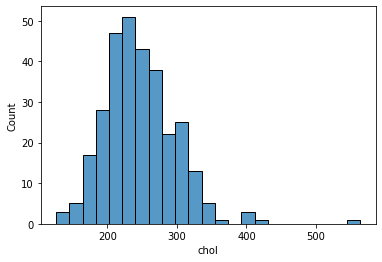

In [72]:
sns.histplot(data=df, x="chol")